In [5]:
import matplotlib.pyplot as plt
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout
from numpy import concatenate
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from math import sqrt
import numpy as np
import pandas as pd

In [3]:
import tensorflow as tf
tf.random.set_seed(2)

In [8]:
qy_data=read_csv(r'C:\Users\qaz25\Desktop\demanddata_2021.csv')
qy_data['SETTLEMENT_DATE']=pd.to_datetime(qy_data['SETTLEMENT_DATE'])
qy_data.set_index('SETTLEMENT_DATE', inplace=True)
qy_data

,SETTLEMENT_PERIOD,ND,TSD,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY,NON_BM_STOR,PUMP_STORAGE_PUMPING,IFA_FLOW,IFA2_FLOW,BRITNED_FLOW,MOYLE_FLOW,EAST_WEST_FLOW,NEMO_FLOW,NSL_FLOW,ELECLINK_FLOW
SETTLEMENT_DATE,,,,,,,,,,,,,,,,,,
2021-01-01,1,28354,28969,26130,1018,6527,0,13080,0,14,2003,-1,0,215,203,999,0,0
2021-01-01,2,28501,29114,26281,1026,6527,0,13080,0,12,2004,-1,0,359,203,999,0,0
2021-01-01,3,27759,28376,25557,1039,6527,0,13080,0,16,2004,-1,0,362,202,999,0,0
2021-01-01,4,26912,27749,24792,1052,6527,0,13080,0,236,2004,-1,0,361,203,1000,0,0
2021-01-01,5,26004,27178,23933,1076,6527,0,13080,0,573,2004,-1,0,304,203,1000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31,44,25718,26611,23602,2005,6527,0,13080,0,17,-272,-4,1052,321,504,853,693,0
2021-12-31,45,24571,25852,22621,2056,6527,0,13080,0,19,-658,-4,1043,321,504,658,693,0
2021-12-31,46,23743,25039,21850,2107,6527,0,13080,0,22,-670,-4,1016,321,504,642,663,0


In [ ]:
value1=qy_data['ENGLAND_WALES_DEMAND'].values
value2=qy_data['ENGLAND_WALES_DEMAND'].values
qy_data=qy_data.drop(['ENGLAND_WALES_DEMAND'])

In [22]:
qy_data

,SETTLEMENT_PERIOD,ND,TSD,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY,NON_BM_STOR,PUMP_STORAGE_PUMPING,IFA_FLOW,IFA2_FLOW,BRITNED_FLOW,MOYLE_FLOW,EAST_WEST_FLOW,NEMO_FLOW,NSL_FLOW,ELECLINK_FLOW
SETTLEMENT_DATE,,,,,,,,,,,,,,,,,,
2021-01-01,1,28354,28969,26130,1018,6527,0,13080,0,14,2003,-1,0,215,203,999,0,0
2021-01-01,2,28501,29114,26281,1026,6527,0,13080,0,12,2004,-1,0,359,203,999,0,0
2021-01-01,3,27759,28376,25557,1039,6527,0,13080,0,16,2004,-1,0,362,202,999,0,0
2021-01-01,4,26912,27749,24792,1052,6527,0,13080,0,236,2004,-1,0,361,203,1000,0,0
2021-01-01,5,26004,27178,23933,1076,6527,0,13080,0,573,2004,-1,0,304,203,1000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31,44,25718,26611,23602,2005,6527,0,13080,0,17,-272,-4,1052,321,504,853,693,0
2021-12-31,45,24571,25852,22621,2056,6527,0,13080,0,19,-658,-4,1043,321,504,658,693,0
2021-12-31,46,23743,25039,21850,2107,6527,0,13080,0,22,-670,-4,1016,321,504,642,663,0


In [23]:
# 获取DataFrame中的数据，形式为数组array形式
values = qy_data.values
# 确保所有数据为float类型
values = values.astype('float32')

In [28]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [29]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j + 1, i)) for j in range(n_vars)]
        # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j + 1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j + 1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
reframed = series_to_supervised(scaled, 2, 1)

In [38]:
# 划分训练集和测试集
values = reframed.values
trainNum = int(len(values) * 0.7)
train_X = values[:trainNum,:]
train_y =  value2[:trainNum]
test_X = values[trainNum:, :]
test_y = value2[trainNum:]

In [50]:
model = Sequential()
model.add(LSTM(27, input_shape=(train_X.shape[1], 1)))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))#激活函数
model.compile(loss='mae', optimizer='adam')
history = model.fit(train_X, train_y, epochs=95, batch_size=2,shuffle=False)

Epoch 1/95
6131/6131 [==============================] - 219s 35ms/step - loss: 25327.3027
Epoch 2/95
6131/6131 [==============================] - 210s 34ms/step - loss: 25185.8242
Epoch 3/95
6131/6131 [==============================] - 209s 34ms/step - loss: 25044.7461
Epoch 4/95
6131/6131 [==============================] - 209s 34ms/step - loss: 24903.1738
Epoch 5/95
6131/6131 [==============================] - 208s 34ms/step - loss: 24760.9863
Epoch 6/95
6131/6131 [==============================] - 199s 33ms/step - loss: 24621.3828
Epoch 7/95
6131/6131 [==============================] - 199s 32ms/step - loss: 24478.9043
Epoch 8/95
6131/6131 [==============================] - 199s 32ms/step - loss: 24337.3438
Epoch 9/95
6131/6131 [==============================] - 198s 32ms/step - loss: 24199.1738
Epoch 10/95
6131/6131 [==============================] - 202s 33ms/step - loss: 24053.2090
Epoch 11/95
6131/6131 [==============================] - 211s 34ms/step - loss: 23908.8848
Epoch 12

6131/6131 [==============================] - 198s 32ms/step - loss: 12614.6797
Epoch 92/95
6131/6131 [==============================] - 198s 32ms/step - loss: 12484.3047
Epoch 93/95
6131/6131 [==============================] - 198s 32ms/step - loss: 12365.8613
Epoch 94/95
6131/6131 [==============================] - 197s 32ms/step - loss: 12226.1875
Epoch 95/95
6131/6131 [==============================] - 197s 32ms/step - loss: 12066.5898


In [64]:
y_predict = model.predict(test_X)

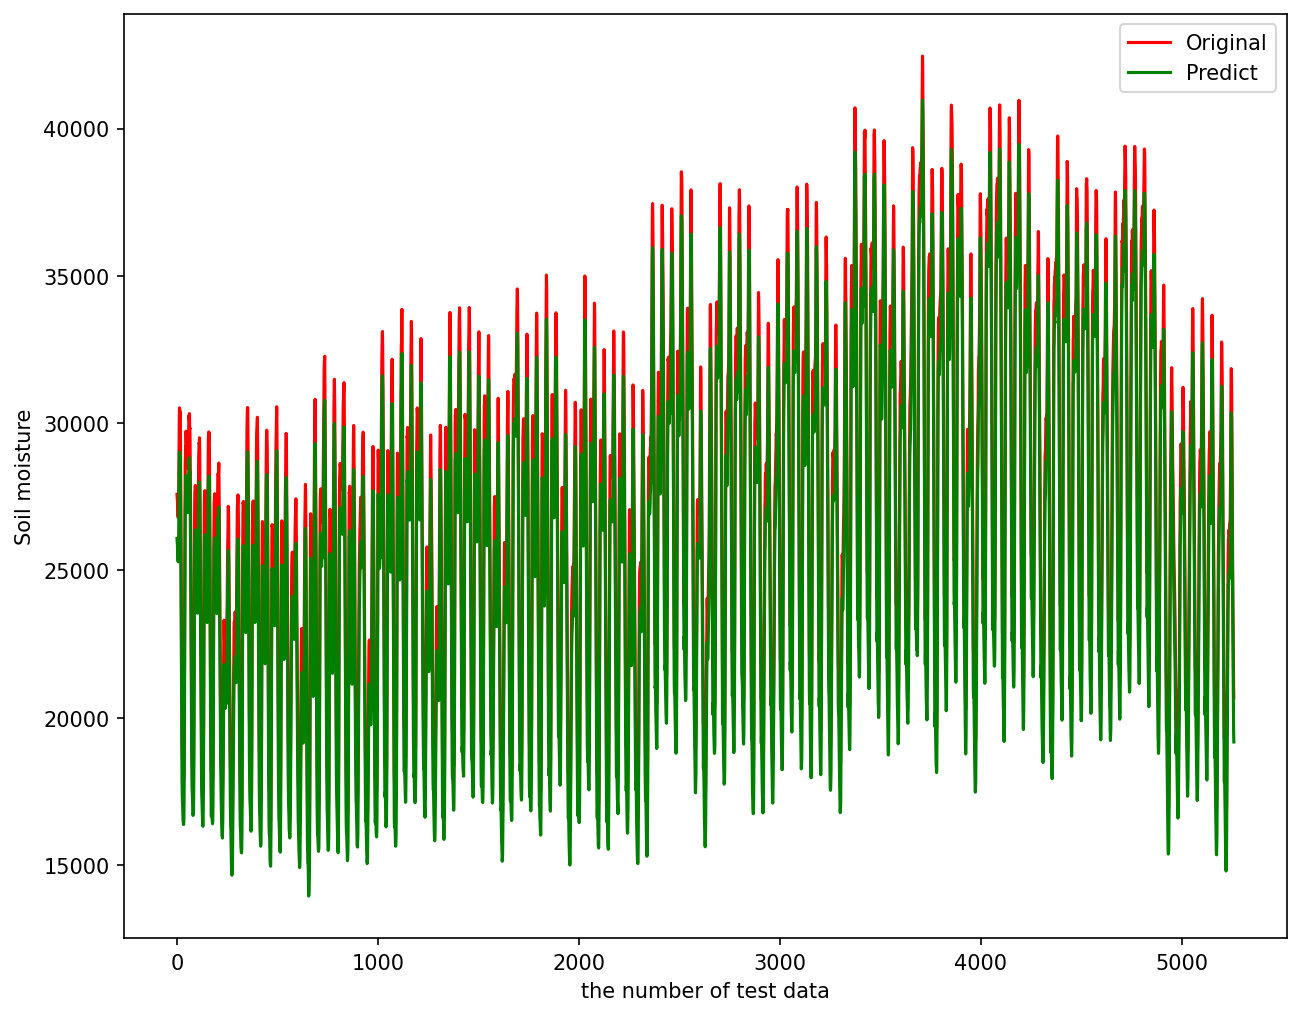

In [63]:
plt.figure(figsize=(10,8),dpi=150)
plt.plot(test_y,color='red',label='Original')
plt.plot(y_predict ,color='green',label='Predict')
plt.xlabel('the number of test data')
plt.ylabel('Soil moisture')
plt.legend()
plt.show()

In [65]:
print("MAE:", mean_absolute_error(test_y, y_predict))
print("MSE:", mean_squared_error(test_y, y_predict))
print("RMSE:", sqrt(mean_squared_error(test_y, y_predict)))
print("R^2:", r2_score(test_y, y_predict))

MAE: 9.54
MSE: 135.78
RMSE: 11.65
R^2: 0.93
